# Comparison of GLM vs decision tree on titanic data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('titanic.txt')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.dropna(subset=['Age'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


<Axes: xlabel='Survived', ylabel='Age'>

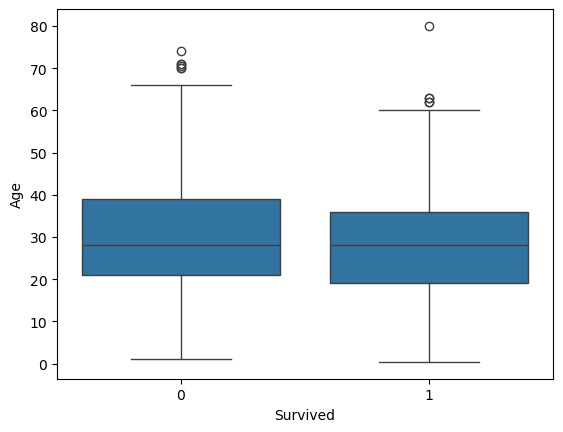

In [53]:
sns.boxplot(x='Survived', y='Age', data = df)

## Splitting & variable selection

In [43]:
#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=586
Testing data set length=128


In [44]:
# Define the dependent (response) variable and independent (predictor) variables
y_train = df_train['Survived']  # Dependent variable
X_train = df_train[['Age']]  # Predictor variables

y_test = df_test['Survived']  # Dependent variable
X_test = df_test[['Age']]  # Predictor variables

## Scaling

In [45]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the predictors
X_train[['Age']] = scaler.fit_transform(X_train[['Age']])  # Scale 'Fare' and 'Age' in training data
X_test[['Age']] = scaler.transform(X_test[['Age']])       # Scale 'Fare' and 'Age' in test data

/var/folders/v8/1_2rlmrd0wl5w5t5n60h8s440000gn/T/ipykernel_5379/1556418214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['Age']] = scaler.fit_transform(X_train[['Age']])  # Scale 'Fare' and 'Age' in training data
/var/folders/v8/1_2rlmrd0wl5w5t5n60h8s440000gn/T/ipykernel_5379/1556418214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['Age']] = scaler.transform(X_test[['Age']])       # Scale 'Fare' and 'Age' in test data


In [46]:
# Add a constant to the design matrix (for the intercept term)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

## GLM

In [47]:
# Fit a GLM model with Poisson family
glm = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

# Display the model summary
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  586
Model:                            GLM   Df Residuals:                      584
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -395.20
Date:                Thu, 05 Dec 2024   Deviance:                       790.40
Time:                        11:38:26   Pearson chi2:                     586.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.008184
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3478      0.084     -4.128      0.0

In [48]:
#Make some predictions on the test data set.
glm_predictions = glm.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
glm_predictions_summary = glm_predictions.summary_frame()
print(glm_predictions_summary)

glm_predicted_counts=glm_predictions_summary['mean']
actual_counts = y_test

         mean   mean_se  mean_ci_lower  mean_ci_upper
1    0.388229  0.023514       0.343258       0.435187
4    0.397341  0.021791       0.355509       0.440730
7    0.500937  0.044897       0.413810       0.588007
11   0.329711  0.041758       0.253538       0.416014
16   0.500937  0.044897       0.413810       0.588007
..        ...       ...            ...            ...
867  0.409602  0.020537       0.370037       0.450374
872  0.403457  0.020995       0.363072       0.445193
873  0.361377  0.031019       0.303048       0.424101
875  0.459631  0.029283       0.403017       0.517307
889  0.425086  0.021048       0.384443       0.466769

[128 rows x 4 columns]


In [49]:
# Extract deviance values from the model
residual_deviance = glm.deviance  # Residual deviance
null_deviance = glm.null_deviance  # Null deviance

# Calculate explained deviance
explained_deviance = 1 - (residual_deviance / null_deviance)

# Print the result
print("Explained Deviance:", explained_deviance)

Explained Deviance: 0.006055553897783783


## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

# initializing the model
tree_model = DecisionTreeClassifier()

# fitting the model to the train data
tree_model.fit(X=X_train, y=y_train)

y_predicted = tree_model.predict(X_train)

## Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

# Create a custom colormap: one color for TP+TN, another for FP+FN
colors = ['lightblue', 'lightcoral']
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Define a matrix for coloring based on TP, TN, FP, FN
colored_cm = np.zeros_like(cm, dtype=int)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:  # TP or TN
            colored_cm[i, j] = 0
        else:  # FP or FN
            colored_cm[i, j] = 1

# Plot the confusion matrix with custom colors
fig, ax = plt.subplots()
im = ax.imshow(colored_cm, cmap=custom_cmap)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black'  # Text color for better contrast
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

# Add axis labels and titles
ax.set_xticks(range(len(['Not Survived', 'Survived'])))
ax.set_yticks(range(len(['Not Survived', 'Survived'])))
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [128, 586]